<a href="https://colab.research.google.com/github/chitreshkr/Natural-Language-Processing-Python/blob/main/Complete_Text_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import spacy

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
from spacy.lang.en.stop_words import STOP_WORDS as stopword

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv',encoding='latin1',header=0)

In [5]:
df

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
...,...,...
3995,i just graduated,1
3996,Templating works; it all has to be done,1
3997,mommy just brought me starbucks,1
3998,@omarepps watching you on a House re-run...lov...,1


# Word Count

In [6]:
len('this is text')

12

In [7]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [8]:
df.sample(5)

,twitts,sentiment,word_counts
286,"i'm tired, and have SAT testing tomorrow",0,7
624,@AndyT13C you may or may not have been ignorin...,0,25
3155,Thanks for following me @ann731735 @stevebunya...,1,8
3797,Live chat with @chrishansen and little less th...,1,23
724,"Ok i'll try to upload my pic... hope it works,...",0,15


In [9]:
df['word_counts'].max()

32

In [10]:
df['word_counts'].min()

1

In [11]:
df[df['word_counts']==1]

,twitts,sentiment,word_counts
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1
1897,@MCRmuffin,0,1
2542,Graduated!,1,1
2947,reading,1,1
3176,@omeirdeleon,1,1
3470,www.myspace.com/myfinalthought,1,1


# Character Count

In [12]:
len('Happy birthday')

14

In [13]:
def char_counts(x):
  s = x.split()
  x = ''.join(s)
  return len(x)

In [14]:
char_counts('Happy birthday')

13

In [15]:
df['char_count'] = df['twitts'].apply(lambda x: char_counts(str(x)))

In [16]:
df.sample(5)

,twitts,sentiment,word_counts,char_count
2889,@Helz53 Don't we all.,1,4,18
2527,@janetheimpaler If there were a &quot;like&quo...,1,17,82
880,@Holleebh have you seen it? it's scary,0,7,32
427,we want API! http://tinyurl.com/o49vf9 #wolfra...,0,12,109
1577,"Kind of a deal-breaker, when u discover a hot...",0,24,113


# Average Word Length

In [17]:
df['avg_word_length'] = df['char_count']/df['word_counts']

In [18]:
df.sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length
8,@phatty84 just hella bored at work lol,0,7,32,4.571429
730,@_skp @_skp time to die..lets jump off the t...,0,21,93,4.428571
1864,Shit it's raining really hard,0,5,25,5.000000
3721,@Brianne_Sanchez Love your articles! Feel like...,1,16,77,4.812500
269,"Its official now,..Am off twitter for a week,....",0,13,63,4.846154


# Stop Words Count

In [19]:
print(stopword)

{'each', 'never', 'otherwise', 'always', 'could', 'moreover', 'three', 'mostly', 'part', 'using', 'enough', 'no', 'one', 'beforehand', 'there', 'very', 'must', 'just', 'show', 'wherein', 'whose', 'say', 'among', 'yourself', 'what', 'give', 'back', 'fifty', 'or', 'put', 'her', 'thereupon', 'cannot', 'somewhere', 'ten', 'about', 'still', 'however', 'on', 'might', 'namely', 'hereby', 'will', 'down', 'with', 'anyhow', 'between', 'am', 'yourselves', '’re', 'per', 'n‘t', 'ourselves', 'beside', 'do', 'doing', 'towards', 'onto', 'n’t', 'during', 'quite', 'off', 'others', 'through', 'up', 'became', 'move', 'many', 'serious', 'somehow', 'empty', 'hundred', 'it', 'since', 'also', 'ours', 'bottom', 'their', 'by', 'fifteen', 'made', 'seemed', 'whither', 'your', 'toward', 'sometimes', 'not', 'same', 'although', 'else', 'we', '’ve', 'being', 'everyone', 'really', 'into', 'whence', 'are', 'neither', "'s", 'than', 'nevertheless', 'perhaps', 'had', 'keep', 'take', 'regarding', 'four', 'other', 'out', '‘

In [20]:
len(stopword)

326

In [21]:
x = 'this is text data'

In [22]:
len([t for t in x.split() if t in stopword])

2

In [23]:
df['stop_word_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in stopword]))

In [24]:
df.sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len
147,"yo, wtf is up with the full &amp; lite view sh...",0,16,55,3.437500,8
2576,The serial stealth bummer strikes again http:...,1,7,58,8.285714,1
1837,"@bawdz not a good display,unfortunate amount o...",0,9,52,5.777778,5
217,@_MAXWELL_ What happened to your planned Orla...,0,14,91,6.500000,2
3814,"@freaky_mushroom, @musicmonster, gracias!",1,3,39,13.000000,0


# Count Hashtag and @Mentions

In [25]:
x = 'this is #hashtag and this is @mention'

In [26]:
x.split()

['this', 'is', '#hashtag', 'and', 'this', 'is', '@mention']

In [27]:
len([t for t in x.split() if t.startswith('#')])

1

In [28]:
len([t for t in x.split() if t.startswith('@')])

1

In [29]:
df['hashtags'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))

In [30]:
df['mentions'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [31]:
df.sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions
345,@FakerPattyPattz Oh dear. Were you drinking ou...,0,12,67,5.583333,4,0,1
3019,on that LG status today...no work....no stress...,1,7,49,7.000000,2,0,0
1950,@steveheath i could use another dunkins this m...,0,14,70,5.000000,6,0,1
1083,aiming for exemption in at least one subject. ...,0,9,63,7.000000,5,0,0
2109,Miley Cyrus - The Climb!!,1,5,21,4.200000,0,0,0


# Numeric Digit Count

In [32]:
x = 'this is 1 and 2'

In [33]:
x.split()

['this', 'is', '1', 'and', '2']

In [34]:
df['numeric_count'] = df['twitts'].apply(lambda x : len([t for t in x.split() if t.isdigit()]))

In [35]:
df.sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count
3905,Playlist for Dance With Vol.10 is finally done...,1,19,76,4.000000,8,0,0,0
2859,I am excited about my free @daytonalagoon wate...,1,14,69,4.928571,4,0,1,0
55,@haemoglobin_ Why?,0,2,17,8.500000,0,0,1,0
2622,I just want to be there When the morning light...,1,25,94,3.760000,9,0,0,0
2057,Brooke im glad you better i miss you!,1,8,30,3.750000,2,0,0,0


# Upper case words counts

In [36]:
x = 'I AM HAPPY'
y = 'i am happy'

In [37]:
[t for t in x.split() if t.isupper()]

['I', 'AM', 'HAPPY']

In [38]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [39]:
df.sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count,upper_counts
2480,Ok so future headache says to me this morning ...,1,23,125,5.434783,6,0,0,0,0
1054,Omfg! This training boring as fuck,0,6,29,4.833333,1,0,0,0,0
3604,Watching Parish Hilton: My New BFF!,1,6,30,5.000000,0,0,0,0,1
2187,you are my hero,1,4,12,3.000000,3,0,0,0,0
1626,overall some excellent results yesterday..but ...,0,9,55,6.111111,3,0,0,0,0


# Lower Case Word Counts

In [40]:
x = 'this is a Text'

In [41]:
x.lower()

'this is a text'

In [42]:
x = 45.0
str(x).lower()

'45.0'

In [43]:
df['twitts'] = df['twitts'].apply(lambda x: str(x).lower())

In [44]:
df.sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count,upper_counts
3990,@littlefletcher sounds great!!!! i hope you lo...,1,10,57,5.700000,2,0,1,0,1
148,@jmarie7481 hahahahaha... i know you're not. s...,0,24,100,4.166667,5,0,1,0,4
3559,why is twilight winning things? it was so shit...,1,15,79,5.266667,5,0,1,0,0
2883,loving all the robert pattinson-ness at the vm...,1,12,61,5.083333,5,0,0,0,0
2750,"@madonnaboy80 go to bed then, silly.",1,6,31,5.166667,2,0,1,0,0


# Contraction and Expansion

In [45]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'}

In [46]:
x = "i'm don't he'll" # "i am do not he will"

In [47]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
    

In [48]:
cont_to_exp(x)

'i am do not he will'

In [49]:
%%timeit
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

10 loops, best of 5: 84.4 ms per loop


In [50]:
df.sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count,upper_counts
257,it should really be family bbq.,0,6,26,4.333333,3,0,0,0,1
1178,"up, my eyes hurt",0,4,13,3.250000,1,0,0,0,1
803,finishing up this darn lab hw.,0,6,25,4.166667,2,0,0,0,0
3220,is being eco-friendly,1,3,19,6.333333,2,0,0,0,0
3519,@court0605 no just a response!,1,5,26,5.200000,3,0,1,0,0


# Count and Remove Emails

In [51]:
import re

In [52]:
df[df['twitts'].str.contains('hotmail.com')]

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count,upper_counts
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0


In [53]:
df.iloc[3713]['twitts']

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [54]:
x = '@securerecs arghh me please  markbradbury_16@hotmail.com'

In [55]:
re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)', x)

['markbradbury_16@hotmail.com']

In [56]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x))

In [57]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [58]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count,upper_counts,emails,emails_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


In [59]:
re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

'@securerecs arghh me please  '

In [60]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x))

In [61]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count,upper_counts,emails,emails_count
3713,@securerecs arghh me please,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


## Count URLs and Remove it 

In [62]:
x = 'hi, thanks to watching it. for more visit https://youtube.com/kgptalkie'

In [63]:
re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'youtube.com', '/kgptalkie')]

In [64]:
df['url_flags'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [65]:
df[df['url_flags']>0].sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count,upper_counts,emails,emails_count,url_flags
3693,&quot;melvin van peebles ã¢ââ save the water...,1,12,102,8.500000,0,0,0,0,2,[],0,1
2902,http://twitpic.com/7j5a6 - olthish picture of me,1,6,42,7.000000,2,0,0,0,0,[],0,1
3434,the hottest game of the year!! free online wor...,1,23,115,5.000000,10,0,0,0,1,[],0,1
1510,"michelle, why are you wearing that headband? d...",0,11,83,7.545455,4,0,0,0,3,[],0,1
1441,the pool killed my contest winning buzz. i am...,0,20,109,5.450000,4,0,0,0,0,[],0,1


In [66]:
x

'hi, thanks to watching it. for more visit https://youtube.com/kgptalkie'

In [67]:
re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

'hi, thanks to watching it. for more visit '

In [68]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x))

In [69]:
df.sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count,upper_counts,emails,emails_count,url_flags
2001,@seriouz973 heyy! yuuu welcummm,1,4,28,7.000000,0,0,1,0,0,[],0,0
992,@theexplodingboi white wine reminds me of vine...,0,7,43,6.142857,2,0,1,0,0,[],0,0
3441,@empirecityatl thanks i am keeping my head up,1,8,38,4.750000,3,0,1,0,1,[],0,0
3948,just went to mana foods and bought suppah food!,1,9,39,4.333333,2,0,0,0,0,[],0,0
609,tonight at mission street food: trumpet mushro...,0,21,114,5.428571,3,0,0,0,0,[],0,0


## *Remove RT*

In [70]:
df[df['twitts'].str.contains('rt')].sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count,upper_counts,emails,emails_count,url_flags
1837,"@bawdz not a good thisplay,unfortunate amount ...",0,9,52,5.777778,5,0,1,0,0,[],0,0
2593,@danworth really... i knew there were connecti...,1,16,89,5.562500,6,0,1,0,1,[],0,0
3219,just put table up in the garden with mum and a...,1,23,81,3.521739,13,0,0,0,0,[],0,0
2826,just watched the day the earth stood still pr...,1,10,53,5.300000,4,0,0,0,0,[],0,0
2871,@davideisert @lpt21 - never too sunny for lego...,1,13,65,5.000000,5,0,2,0,0,[],0,0


In [71]:
x = 'rt @username: hello hirt'

In [72]:
re.sub(r'\brt\b', '', x).strip()

'@username: hello hirt'

In [73]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'\brt\b', '', x).strip())

In [74]:
df.sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count,upper_counts,emails,emails_count,url_flags
2411,do not feel very well so i am just gonna rest ...,1,13,58,4.461538,6,0,0,0,0,[],0,0
3634,thinking of fuzzball more than air france,1,8,60,7.500000,3,0,0,0,0,[],0,1
455,the lion and the mouse tinggal 4 baris tapi be...,0,12,54,4.500000,3,0,0,1,0,[],0,0
3869,@tommcfly what about mtv movie awards? turn th...,1,10,54,5.400000,3,0,1,0,1,[],0,0
2847,green tea,1,2,8,4.000000,0,0,0,0,0,[],0,0


## Special Chars removal or punctuation removal 

In [75]:
x = '@duyku apparently i was not ready enough... i...'

In [76]:
re.sub(r'[^\w ]+', "", x)

'duyku apparently i was not ready enough i'

In [77]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'[^\w ]+', "", x))

In [78]:
df.sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count,upper_counts,emails,emails_count,url_flags
3864,the first day of quotrealquot rehersals of 42s...,1,21,91,4.333333,12,0,0,0,1,[],0,0
285,mallory0905 i guess you never got that tomato ...,0,22,114,5.181818,10,0,1,0,0,[],0,0
1515,army_wife4life it did for a few minutesshe now...,0,21,87,4.142857,11,0,1,3,0,[],0,0
3583,good morning i am very happy today i am at l...,1,12,52,4.333333,2,0,0,0,0,[],0,0
2643,were here well in adrian atleast,1,6,32,5.333333,2,0,0,0,0,[],0,0


## Remove multiple spaces `"hi   hello    "`

In [79]:
x =  'hi    hello     how are you'

In [80]:
' '.join(x.split())

'hi hello how are you'

In [81]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join(x.split()))

## Remove HTML tags

In [82]:
!pip install beautifulsoup4

In [83]:
from bs4 import BeautifulSoup

In [84]:
x = '<html><h1> thanks for watching it </h1></html>'

In [85]:
x.replace('<html><h1>', '').replace('</h1></html>', '') #not rec

' thanks for watching it '

In [86]:
BeautifulSoup(x, 'lxml').get_text().strip()

'thanks for watching it'

In [87]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text().strip())

CPU times: user 725 ms, sys: 40.9 ms, total: 766 ms
Wall time: 770 ms


In [88]:
df.sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count,upper_counts,emails,emails_count,url_flags
819,does not want to go,0,4,15,3.750000,2,0,0,0,0,[],0,0
3161,just spent several hours in the garden putting...,1,24,117,4.875000,8,0,0,0,0,[],0,0
799,prettty cold out today dying my hair today tex...,0,10,44,4.400000,2,0,0,0,0,[],0,0
1352,had a little accident my big toe is incredibly...,0,16,80,5.000000,5,0,0,0,0,[],0,0
1945,what a rainy f1 force india seem so lost in sh...,0,11,43,3.909091,4,0,0,0,1,[],0,0


## Remove Accented Chars 

In [89]:
x = 'Áccěntěd těxt'

In [90]:
import unicodedata

In [91]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [92]:
remove_accented_chars(x)

'Accented text'

In [93]:
df['twitts'] = df['twitts'].apply(lambda x: remove_accented_chars(x))

## Remove Stop Words 


In [94]:
x = 'this is a stop words'

In [96]:
' '.join([t for t in x.split() if t not in stopword])

'stop words'

In [98]:
df['twitts_no_stop'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopword]))

In [99]:
df.sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
1231,ikaikatilton not too well i am miserable but i...,0,18,76,4.222222,7,0,1,0,1,[],0,0,ikaikatilton miserable know look right
317,nazf i cannot see it,0,5,17,3.400000,4,0,1,0,1,[],0,0,nazf
1494,i am still alive but i need some miracle do no...,0,23,91,3.956522,7,0,1,0,2,[],0,0,alive need miracle want feel kind pain yep den...
545,if its the person i think it iswhy the fuck ar...,0,26,112,4.307692,10,0,0,0,0,[],0,0,person think iswhy fuck leaving voicemailif no...
3568,zvespano hey zhirlyn congrats on your baby gir...,1,13,58,4.461538,4,0,1,0,0,[],0,0,zvespano hey zhirlyn congrats baby girl arent fun


## Convert into base or root form of word 

In [100]:
nlp = spacy.load('en_core_web_sm')

In [101]:
x = 'this is chocolates. what is times? this balls'

In [102]:
def make_to_base(x):
    x = str(x)
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text

        x_list.append(lemma)
    return ' '.join(x_list)

In [103]:
make_to_base(x)

'this is chocolate . what is time ? this ball'

In [104]:
df['twitts'] = df['twitts'].apply(lambda x: make_to_base(x))

In [105]:
df.sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
2357,kellykenniff i love you,1,4,21,5.250000,2,0,1,0,0,[],0,0,kellykenniff love
3559,why is twilight win thing it was so shite grrr...,1,15,79,5.266667,5,0,1,0,0,[],0,0,twilight winning things shite grrr hope mileyc...
1622,how is it 8 p.m. on sunday night already,0,8,33,4.125000,4,0,0,0,0,[],0,0,8pm sunday night
338,in bed alone again that is what happen after a...,0,28,109,3.892857,8,0,1,0,1,[],0,0,bed happens long wkend work fell asleep couch ...
150,just been for a jacuzzi now time to pack,0,9,33,3.666667,4,0,0,0,0,[],0,0,jacuzzi time pack


## Common words removal 

In [106]:
x = 'this is this okay bye'

In [107]:
text = ' '.join(df['twitts'])

In [108]:
len(text)

273716

In [109]:
text = text.split()

In [110]:
len(text)

54242

In [111]:
freq_comm = pd.Series(text).value_counts()

In [112]:
f20 = freq_comm[:20]

In [113]:
f20

i       2531
to      1461
the     1299
a        957
you      896
not      894
is       880
my       825
it       735
and      733
have     693
do       618
in       571
for      521
of       482
go       480
am       472
that     458
get      448
me       432
dtype: int64

In [114]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

In [115]:
df.sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
2111,kameronkhaos 5 day re lucky suppose 18 bad either,1,12,57,4.750000,3,0,1,2,0,[],0,0,kameronkhaos 5 days youre lucky suppose 18 bad
3891,jsjv didi wanna learn italiano after watch ang...,1,17,98,5.764706,6,1,1,0,0,[],0,0,jsjv didi wanna learn italiano watching angels...
1068,amytweet glad hear are all right very good tha...,0,32,105,3.281250,21,0,1,0,0,[],0,0,amytweets glad hear right good thanks hard wor...
3865,difinch well probably make her feal better but...,1,12,62,5.166667,6,0,1,0,0,[],0,0,difinch probably feal better probably depressed
684,m new this so bear with meim so bored,0,10,36,3.600000,5,0,0,0,0,[],0,0,im new bear meim bored


# Rare Word Removal

In [116]:
rare20 = freq_comm.tail(20)

In [117]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [118]:
df.sample(5)

,twitts,sentiment,word_counts,char_count,avg_word_length,stop_word_len,hashtags,mentions,numeric_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
3773,youngcash hey stranger sooo was invite this event,1,10,51,5.10,2,0,1,0,1,[],0,0,youngcash hey stranger sooo invited event
1154,was so engross tv series eat too much ravioli ...,0,25,92,3.68,16,0,0,0,1,[],0,0,engrossed tv series ate ravioli wouldnt surpri...
3537,watch quotmurder by deathquot such classic love,1,10,54,5.40,3,0,0,0,1,[],0,0,watching quotmurder deathquot classic love
3124,edmasencullen ah right 108 gah your old mofo o...,1,16,68,4.25,2,0,1,1,2,[],0,0,edmasencullen ah right 108 gah old mofo occ lo...
2472,chill with lady beautiful out,1,6,39,6.50,2,0,0,0,0,[],0,0,chilling ladies beautiful


# Word Cloud Visualization 

In [119]:
!pip install wordcloud

In [120]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
text = ' '.join(df['twitts'])

In [122]:
len(text)

220782

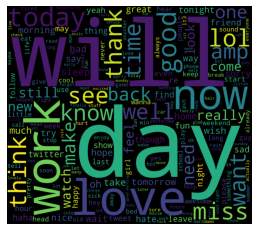

In [125]:
wc = WordCloud(width=1800, height=1600).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

## Spelling Correction 

In [126]:
!pip install -U textblob

Requirement already up-to-date: textblob in /usr/local/lib/python3.7/dist-packages (0.15.3)


In [127]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [128]:
from textblob import TextBlob

In [129]:
x = 'thankks forr waching it'

In [130]:
x = TextBlob(x).correct()

In [131]:
x

TextBlob("thanks for watching it")

## Tokenization using TextBlob


In [132]:
x = 'thanks#watching this video. please like it'

In [133]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [134]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
this
video
.
please
like
it


## Detecting Nouns 

In [139]:
x = 'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [140]:
doc = nlp(x)

In [141]:
for noun in doc.noun_chunks:
    print(noun)

Breaking News
Donald Trump
the president
the USA
a deal
the moon


## Language Translation and Detection

In [142]:
x

'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [143]:
tb = TextBlob(x)

In [144]:
tb.detect_language()

'en'

In [145]:
tb.translate(to = 'zh')

TextBlob("最新消息：美国总统唐纳德·特朗普（Donald Trump）希望签署一项开采月球的协议")

## Use TextBlob's Inbuilt Sentiment Classifier 

In [146]:
from textblob.sentiments import NaiveBayesAnalyzer

In [147]:
x = 'we all stands together. we are gonna win this fight'

In [148]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [149]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.9180581552428241, p_neg=0.0819418447571765)